<a href="https://colab.research.google.com/github/sumeet6510/Rossmann-Sales-Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### For any business growth it is very important to know it's future business and take steps accordingly to improve or grow their business.

### Here we have Rossmann various stores and we are to predict sales for different stores.

### Let's start by exploring data set, which are the factors affecting Sales in this stores.

### Importing required libraries

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Capstone Project 2/data/'

##**Exploring 1st Dataset.**


In [ ]:
# Importing Data set
# Sales_df = pd.read_csv(folder + 'Rossmann Stores Data.csv')
Sales_df = pd.read_csv('/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 1/Capstone Project 2/Data & Resources/Rossmann Stores Data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
Sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
Sales_df.groupby('Store').count().reset_index()['DayOfWeek'].nn
 

array([942, 758, 941])

In [ ]:
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


### This dataset contains information on various stores associated with Rossmann. It has information for sales for each day, no. of customers on that day, holidays, Promos for each day and what day of week it is. 

### There are no null/ missing values.

###Let's see for how much time this data was collected. 

In [ ]:
print(Sales_df['Date'].min(),'- start')
print(Sales_df['Date'].max(), '- end')

2013-01-01 - start
2015-07-31 - end


### It is almost 3 years data.

### Now we will check various conditions for Sales that can be false. Like if there is any negative sale, etc.



In [ ]:
### Checking for Duplicates
Sales_df[Sales_df.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [ ]:
### Will Check sales is less than 0 for any day
Sales_df[Sales_df['Sales'] < 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [ ]:
### If store is closed and there is sale
Sales_df[(Sales_df['Open'] == 0) & (Sales_df['Sales'] != 0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [ ]:
# Closed Stores
len(Sales_df[Sales_df['Open'] == 0])

172817

In [ ]:
# If store is closed and Sales is also 0.
len(Sales_df[(Sales_df['Open'] == 0) & (Sales_df['Sales']==0)])

172817

### If the store is closed, we don't need to give any sales prediction for that store.

### Also closed stores and closed stores with 0 sales are equal. So we can remove those observations as well as can get rid of the 'Open' column. 

In [ ]:
### Removing observations where store is closed and sale is 0.
Sales_df = Sales_df[(Sales_df['Open'] == 1)]

In [ ]:
### Dropping Open column as it has single observation for all now. 
Sales_df.drop(['Open'],axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


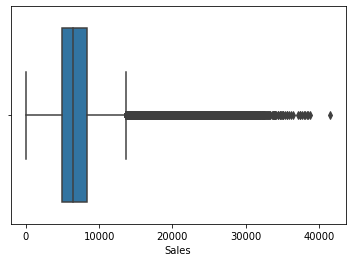

In [ ]:
# Checking outliers in Sales
sns.boxplot(Sales_df['Sales'])

### We have no misleading values in this dataset. i.e. No negative sales or sale when store was closed. 

### Many outliers on right side in above plot. So might be those stores are having high sales. But will remove still those with very high sales.

###**Using Isolation Forest to remove outliers only in Sales**

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.005)
isolation_forest.fit(Sales_df['Sales'].values.reshape(-1, 1))
Sales_df['anomaly_score_univariate_sales'] = isolation_forest.decision_function(Sales_df['Sales'].values.reshape(-1, 1))
Sales_df['outlier_univariate_sales'] = isolation_forest.predict(Sales_df['Sales'].values.reshape(-1, 1))

### From above plot it is clear intution that our outliers would be above 19000 or 20000.

In [ ]:
# Sanity check if there are no outliers removed below 19000
Sales_df[(Sales_df['outlier_univariate_sales']==-1) & (Sales_df['Sales']<19000)]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,anomaly_score_univariate_sales,outlier_univariate_sales


In [ ]:
# Total outliers detected
len(Sales_df[Sales_df['outlier_univariate_sales']==-1])

4170

### Outliers are very few compared to our dataset. So can remove them. 

In [ ]:
# Subsetting DF other than outliers.
Sales_df = Sales_df[Sales_df['outlier_univariate_sales']==1]

In [ ]:
# Removing Isolation Forest columns
Sales_df.drop(['anomaly_score_univariate_sales','outlier_univariate_sales'],axis = 1, inplace=True)

### Exploring some features. 

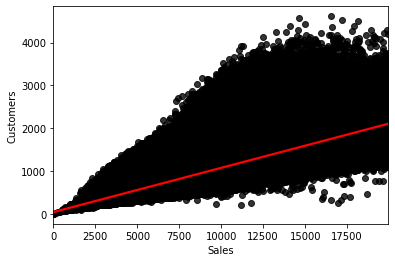

In [ ]:
# How customers affect sales
sns.regplot(x=Sales_df['Sales'], y=Sales_df['Customers'],scatter_kws={"color": "black"}, line_kws={"color": "red"})

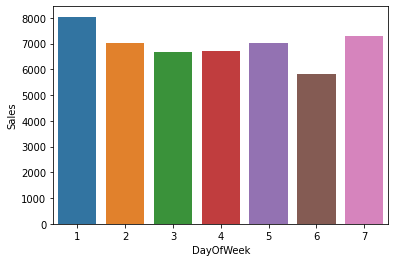

In [ ]:
# How Sales differ in each day of week
Avg_week_sales = pd.DataFrame(Sales_df.groupby('DayOfWeek').agg({'Sales':'mean'}))
sns.barplot(x=Avg_week_sales.index, y = Avg_week_sales['Sales'])

### High sales in starting of week. On Sunday only some stores are open and they are making great Sale.

In [ ]:
# Store open on Sunday
Sales_df[(Sales_df['DayOfWeek']==7)]['Store'].unique()

array([  85,  122,  209,  259,  274,  299,  310,  335,  353,  423,  433,
        453,  494,  512,  524,  530,  578,  676,  682,  732,  733,  769,
        863,  867,  931,  948, 1045, 1081, 1097, 1099,  562,  877])

### How sales differ with Promo

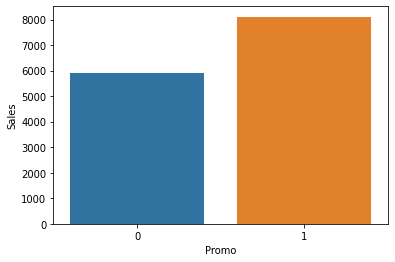

In [ ]:
Avg_Promo_sales = pd.DataFrame(Sales_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Avg_Promo_sales.index, y = Avg_Promo_sales['Sales'])

###Sales on Holidays and Holiday Counts

Text(0, 0.5, 'Counts')

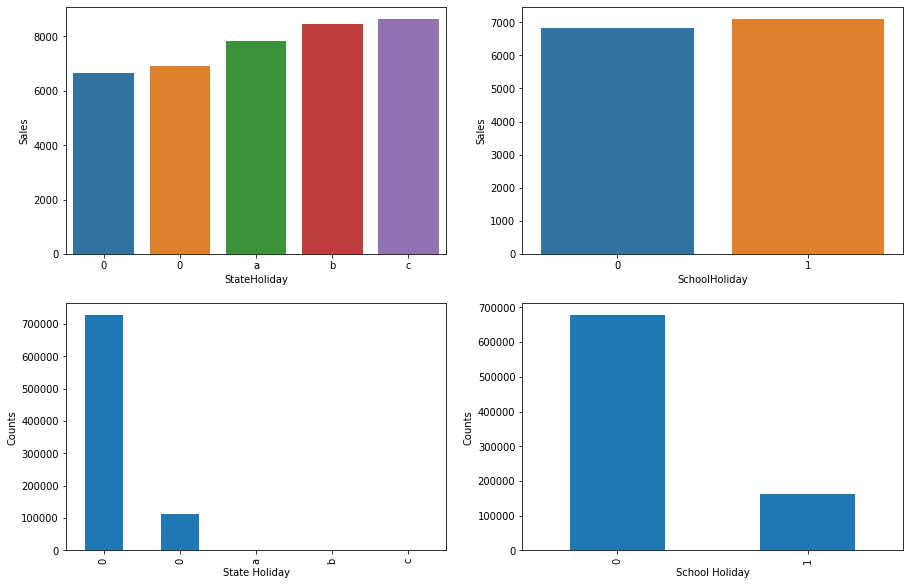

In [ ]:
Avg_StateHoliday_sales = pd.DataFrame(Sales_df.groupby('StateHoliday').agg({'Sales':'mean'}))
Avg_SchoolHoliday_sales = pd.DataFrame(Sales_df.groupby('SchoolHoliday').agg({'Sales':'mean'}))

# How sales differ in holidays
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Avg_StateHoliday_sales.index, y = Avg_StateHoliday_sales['Sales'])
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Avg_SchoolHoliday_sales.index, y = Avg_SchoolHoliday_sales['Sales'])

# How many Total School and State holidays
ax1=plt.subplot(2, 2,4)
Sales_df['SchoolHoliday'].value_counts().plot(kind='bar')
plt.xlabel('School Holiday')
plt.ylabel('Counts')
ax1=plt.subplot(2, 2,3)
Sales_df['StateHoliday'].value_counts().plot(kind='bar')
plt.xlabel('State Holiday')
plt.ylabel('Counts')

### NO much difference in sales on School Holidays. On state holidays all stores are to be closed except few.

### But for state holidays we have two 0 columns and others are strings. So will convert all of them to numerical.

### Also count for state holidays is less. So will aggregate all State Holidays as 1.

In [ ]:
def num_state_holidays(string):
  if (string == 'a') | (string == 'b') | (string == 'c'):
    return 1
  else:
    return 0

In [ ]:
Sales_df['StateHoliday'] = Sales_df['StateHoliday'].apply(num_state_holidays)

In [ ]:
Sales_df['StateHoliday'].value_counts()

0    839349
1       873
Name: StateHoliday, dtype: int64

###We have gone through all features initially and have see how sales differ for all of them. 

###**Avg Sales and Customer Data Set**

In [ ]:
Avg_customer_df = pd.DataFrame(Sales_df.groupby('Store').agg({'Customers':['mean']}))
Avg_sales_df = pd.DataFrame(Sales_df.groupby('Store').agg({'Sales':['mean']}))

In [ ]:
Avg_customer_df.columns = ['Avg_customers']
Avg_sales_df.columns = ['Avg_sales']

In [ ]:
Avg_customer_df

,Avg_customers
Store,
1,564.049936
2,583.998724
3,750.077022
4,1321.752551
5,537.340180
...,...
1111,451.711168
1112,829.988296
1113,717.029337


In [ ]:
Avg_sales_df

,Avg_sales
Store,
1,4759.096031
2,4953.900510
3,6942.568678
4,9638.401786
5,4676.274711
...,...
1111,5251.702182
1112,10076.834850
1113,6627.859694


##**Exploring 2nd DataSet**

### **Meanwhile will see our next dataset and try to relate that dataset with this df.**

In [ ]:
#Importing Dataset
# store_df = pd.read_csv(folder + 'store.csv')
store_df = pd.read_csv('/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 1/Capstone Project 2/Data & Resources/store.csv')

In [ ]:
store_df.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [ ]:
store_df.shape

(1115, 10)

In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###This dataset contains information on all stores. Like type of store, range of products, competitions and if store is participating in different promo and for how long.

### We have null/ missing values in some columns. Will try to deal with them first.

### Also we have store column that is common and will see if it is unique and we can merge to 1st DF.

In [ ]:
set(pd.DataFrame(Sales_df['Store'].value_counts()).index.to_list()) - set(pd.DataFrame(store_df['Store'].value_counts()).index.to_list())

set()

### Both have equal n same no of stores. So can merge based on this column after analysis done. 

### Tring to see if any pattern in null values.

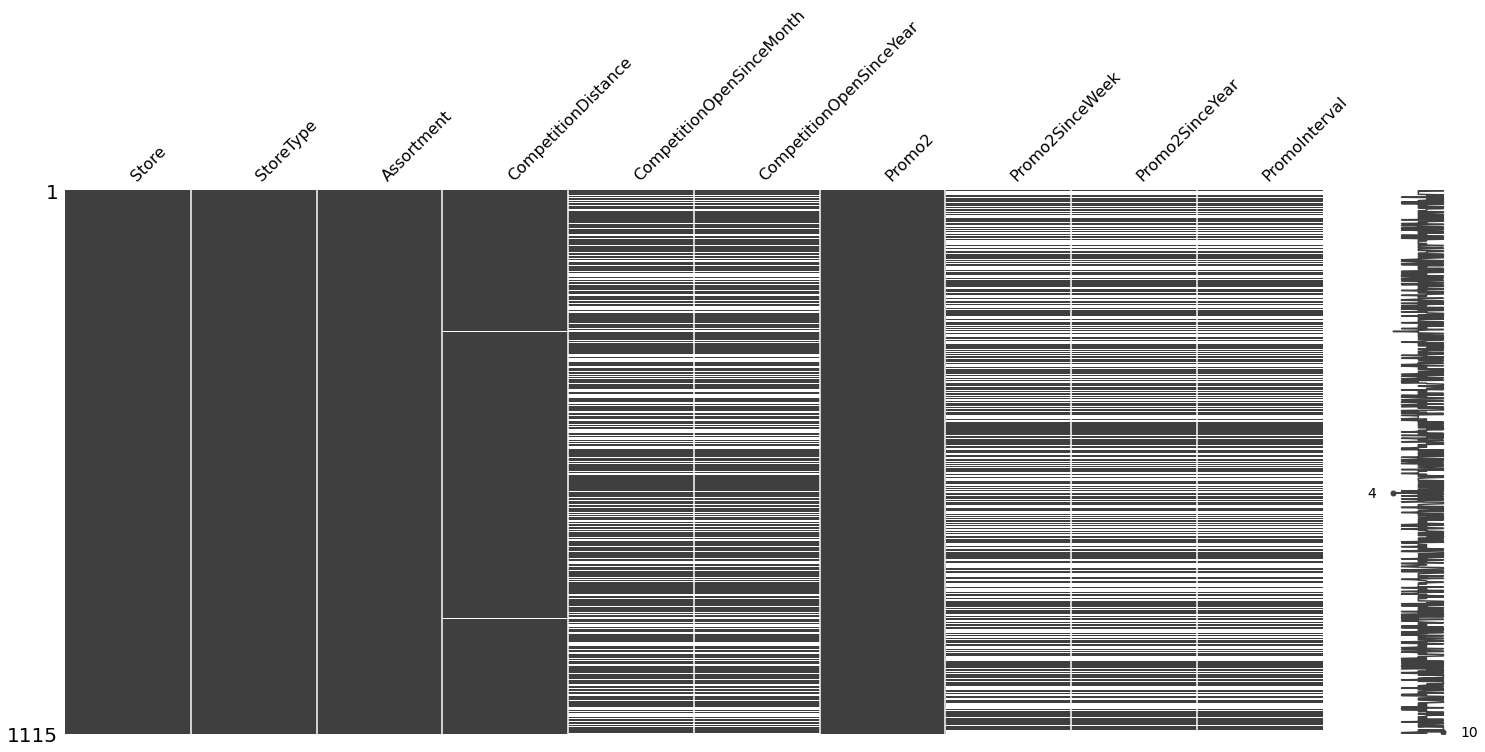

In [ ]:
import missingno as msno
msno.matrix(store_df)

### Above plot shows for last three columns all null values are in same column. 

###Check if Store participating in Promo and if no info for Promo week, Promo Year and Promo Interval

In [ ]:
len(store_df[(store_df['Promo2'] == 1) & (store_df['Promo2SinceWeek'].isna()) ])

0

In [ ]:
len(store_df[(store_df['Promo2'] == 1) & (store_df['Promo2SinceYear'].isna()) ])

0

In [ ]:
len(store_df[(store_df['Promo2'] == 1) & (store_df['PromoInterval'].isna()) ])

0

### There are no such stores that are running promo and information for them is missing.

### So we can impute 0 for rest as that will not be running any promo and Info for Promo week, Promo year and Promo Interval would be 0 for them.

### For Now we will just impute 0 in Promo Interval. For rest 2 we will see later. 

In [ ]:
# Replacing Nan with 0 in PromoInterval col.
store_df.update(store_df[['PromoInterval']].fillna(0))

###For competition distance can directly replace Nan by mean, because only 3 missing values. 

### For Month and year can not use mean or mode as there are many missing values. So will try different methods like ffill and backfill to not get same values for all those missing but later.

In [ ]:
# Replacing missing values in competition distance with mean
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mean(),inplace=True)

###**Exploring Catagorical variables in Store Df.**

### Store types count

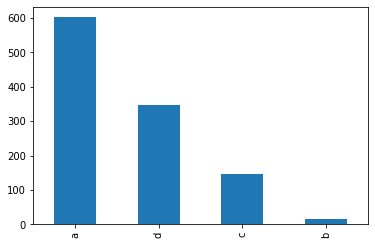

In [ ]:
store_df['StoreType'].value_counts().plot(kind='bar')

###Assortment counts

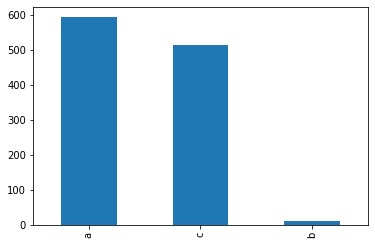

In [ ]:
store_df['Assortment'].value_counts().plot(kind='bar')

### Promo2

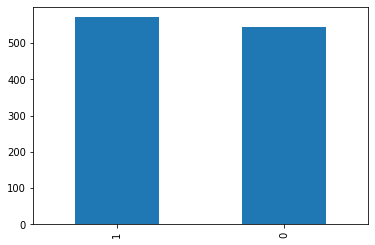

In [ ]:
store_df['Promo2'].value_counts().plot(kind='bar')

In [ ]:
store_df['PromoInterval'].value_counts()

0                   544
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [ ]:
# Merging avg customer dataset with store df
store_df = pd.merge(store_df,Avg_customer_df, on = 'Store', how = 'left')

In [ ]:
# Merging avg customer dataset with store df
store_df = pd.merge(store_df,Avg_sales_df, on = 'Store', how = 'left')

In [ ]:
store_df.head(3)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_customers,Avg_sales
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,0,564.049936,4759.096031
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",583.998724,4953.900510
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",750.077022,6942.568678


##**Final Data Set**

###Now we already have unique stores in both datasets, so can merge both data sets and draw some meanigful insights from that.

In [ ]:
# Mrging both DFs
Final_df = pd.merge(Sales_df,store_df, on = 'Store', how = 'left')

In [ ]:
# Shape of final dataset
Final_df.shape

(840222, 19)

### EDA and re-arranging Final Dataset

In [ ]:
# If store is open and there is no sale
len(Final_df[(Final_df['Sales'] == 0)])

54

### There are very few observations where Sales is 0. This can be a possibility that on certain days there was no Sale.

##**Feature Eng**

In [ ]:
# One hot encoding
Final_df = pd.get_dummies(Final_df, columns=['StoreType','PromoInterval', 'Assortment'], prefix=['StoreType','PromoInterval', 'Assortment'])

### Date columns to Date time and extract month and year.

In [ ]:
import datetime

In [ ]:
# Seperating month, year and day from date.
Final_df['Month'] = pd.DatetimeIndex(Final_df['Date']).month
Final_df['Year'] = pd.DatetimeIndex(Final_df['Date']).year
Final_df['Day'] = pd.DatetimeIndex(Final_df['Date']).day

In [ ]:
# Dropping original Date column. 
#Final_df.drop(['Date'],axis = 1, inplace=True)

### Now we will find Total competition months by aggregating 'Total_competition_year' and 'Total_competition_months' for each obsservation. 

In [ ]:
Final_df['Total_competition_year'] = Final_df['Year'] - Final_df['CompetitionOpenSinceYear']

In [ ]:
Final_df['Total_competition_months'] = (Final_df['Total_competition_year']*12) - (Final_df['CompetitionOpenSinceMonth'] - 1) + (Final_df['Month'])

In [ ]:
# Removing both original columns
Final_df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Total_competition_year'],axis = 1, inplace=True)

###Doing Same for Promo as well.

In [ ]:
Final_df['Total_promo_years'] = Final_df['Year'] - Final_df['Promo2SinceYear']

In [ ]:
Final_df['Total_promo_weeks'] = (Final_df['Total_promo_years']*52) - (Final_df['Promo2SinceWeek']-1) + (Final_df['Month']*4)

In [ ]:
# Removing both original columns
Final_df.drop(['Total_promo_years', 'Promo2SinceYear', 'Promo2SinceWeek'],axis = 1, inplace=True)

### Now we will replace null values in both this columns to get a complete dataset. 

In [ ]:
# Replacing Nan with 0 in below cols.
Final_df.update(Final_df[['Total_promo_weeks']].fillna(0))

In [ ]:
# Replacing missing values in Competition open since month by ffill, limit = 2
Final_df.fillna(method='ffill', limit = 1, inplace = True)

In [ ]:
# Replacing missing values in Competition open since month by ffill, limit = 2
Final_df.fillna(method='backfill', limit = 2, inplace = True)

In [ ]:
# Filling rest values with mean
Final_df['Total_competition_months'].fillna(Final_df['Total_competition_months'].mean(),inplace=True)

In [ ]:
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840222 entries, 0 to 840221
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Store                           840222 non-null  int64  
 1   DayOfWeek                       840222 non-null  int64  
 2   Date                            840222 non-null  object 
 3   Sales                           840222 non-null  int64  
 4   Customers                       840222 non-null  int64  
 5   Promo                           840222 non-null  int64  
 6   StateHoliday                    840222 non-null  int64  
 7   SchoolHoliday                   840222 non-null  int64  
 8   CompetitionDistance             840222 non-null  float64
 9   Promo2                          840222 non-null  int64  
 10  Avg_customers                   840222 non-null  float64
 11  Avg_sales                       840222 non-null  float64
 12  StoreType_a     

###Finally we have a complete dataset with no missing values. 

##**EDA of 2nd DF with Final DF and Distributions**

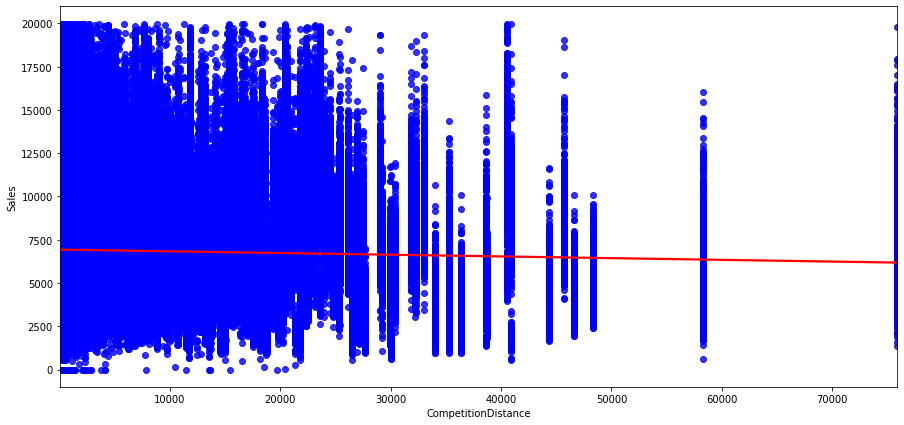

In [ ]:
plt.rcParams['figure.figsize'] = (12, 5)
sns.regplot(x=Final_df['CompetitionDistance'], y = Final_df['Sales'],scatter_kws={"color": "blue"}, line_kws={"color": "red"})

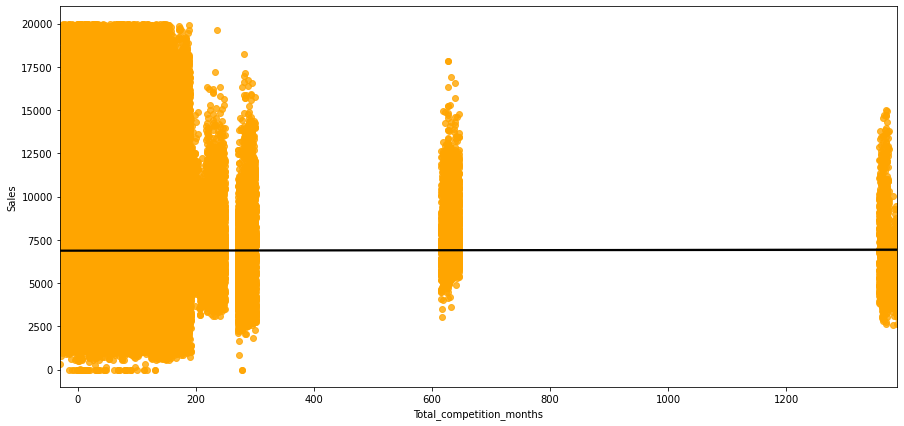

In [ ]:
sns.regplot(x=Final_df['Total_competition_months'], y = Final_df['Sales'],scatter_kws={"color": "orange"}, line_kws={"color": "black"})

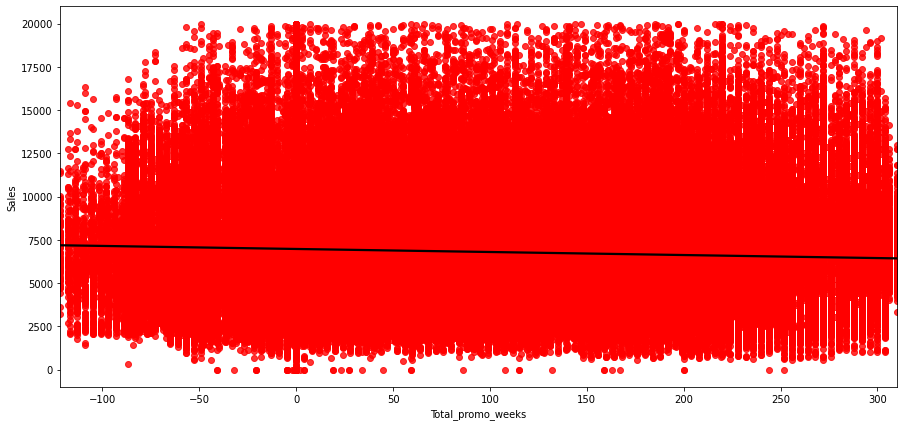

In [ ]:
sns.regplot(x=Final_df['Total_promo_weeks'], y = Final_df['Sales'],scatter_kws={"color": "red"}, line_kws={"color": "black"})

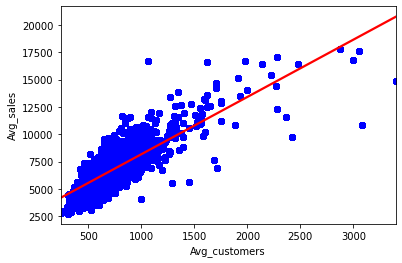

In [ ]:
sns.regplot(x=Final_df['Avg_customers'], y = Final_df['Avg_sales'],scatter_kws={"color": "blue"}, line_kws={"color": "red"})

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

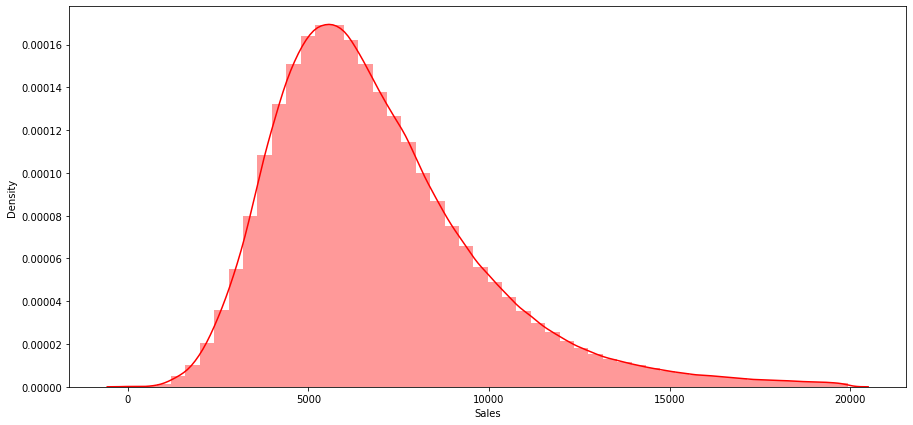

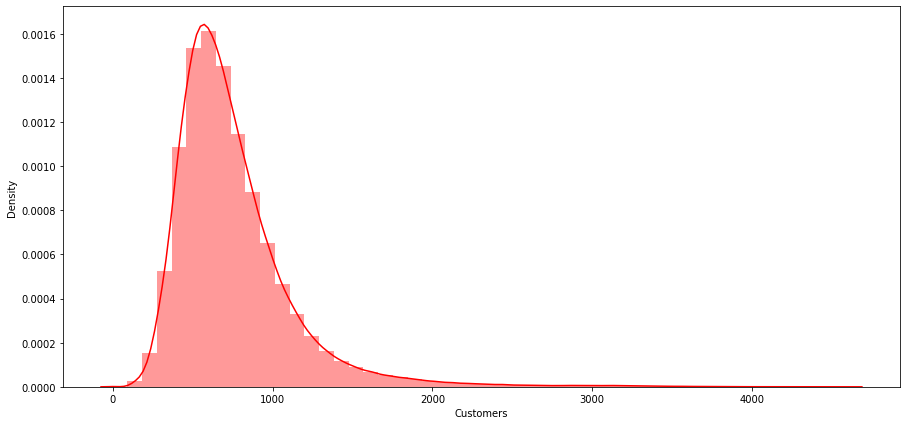

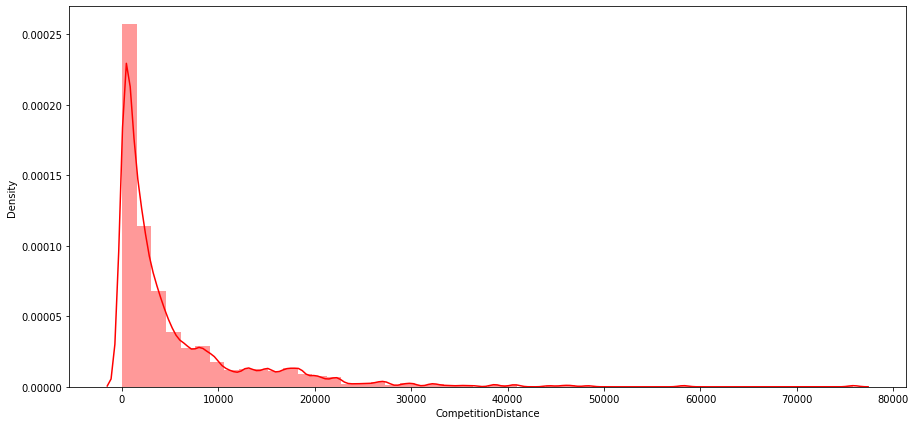

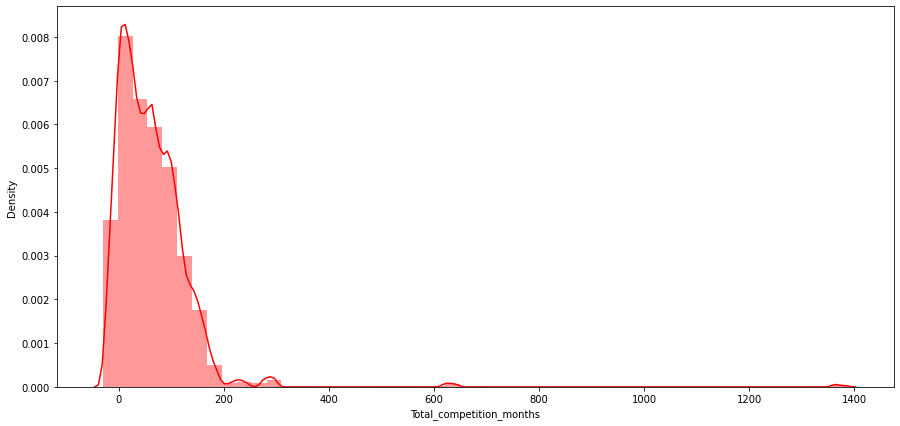

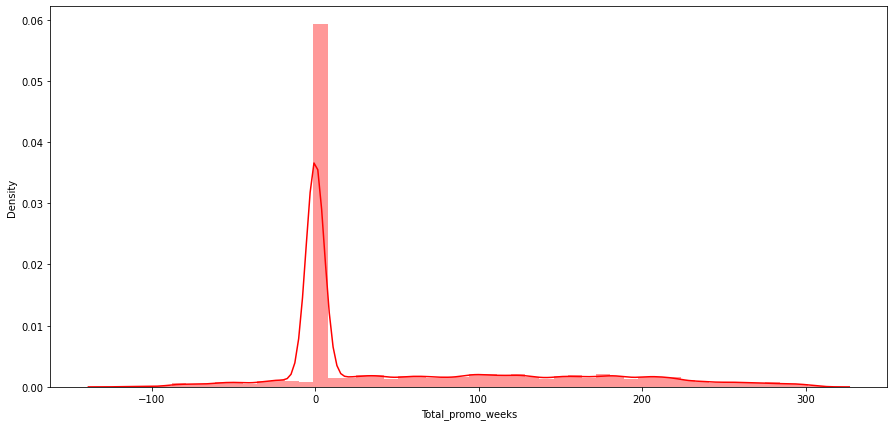

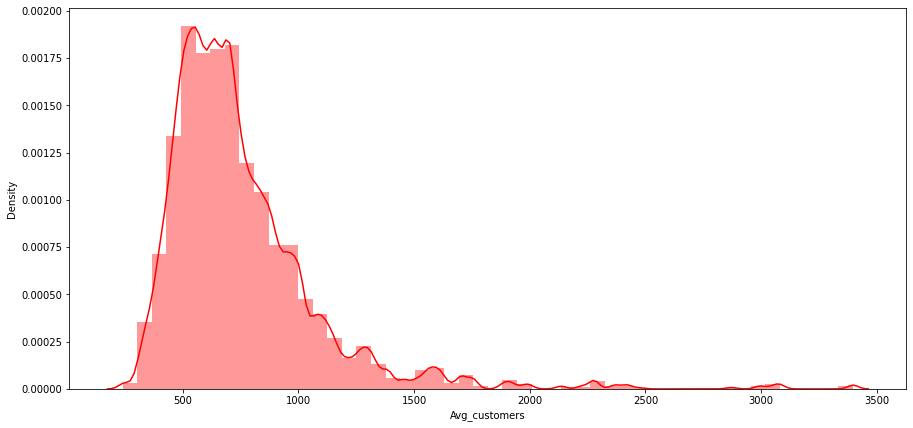

In [ ]:
# Distributions
for col in ['Sales', 'Customers', 'CompetitionDistance', 'Total_competition_months','Total_promo_weeks', 'Avg_customers']:
  plt.figure()
  sns.distplot(Final_df[col], color='r')

In [ ]:
Final_df.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Avg_customers,StoreType_a,StoreType_b,StoreType_c,StoreType_d,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Assortment_a,Assortment_b,Assortment_c,Month,Year,Day,Total_competition_months,Total_promo_weeks
0,1,5,2015-07-31,5263,555,1,0,1,1270.0,0,564.049936,0,0,1,0,1,0,0,0,1,0,0,7,2015,31,83.0,0.0
1,2,5,2015-07-31,6064,625,1,0,1,570.0,1,583.998724,1,0,0,0,0,0,1,0,1,0,0,7,2015,31,93.0,276.0
2,3,5,2015-07-31,8314,821,1,0,1,14130.0,1,750.077022,1,0,0,0,0,0,1,0,1,0,0,7,2015,31,104.0,223.0


In [ ]:
# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
Final_df['Date'] = Final_df['Date'].apply(lambda x: (str(x)[:7]))

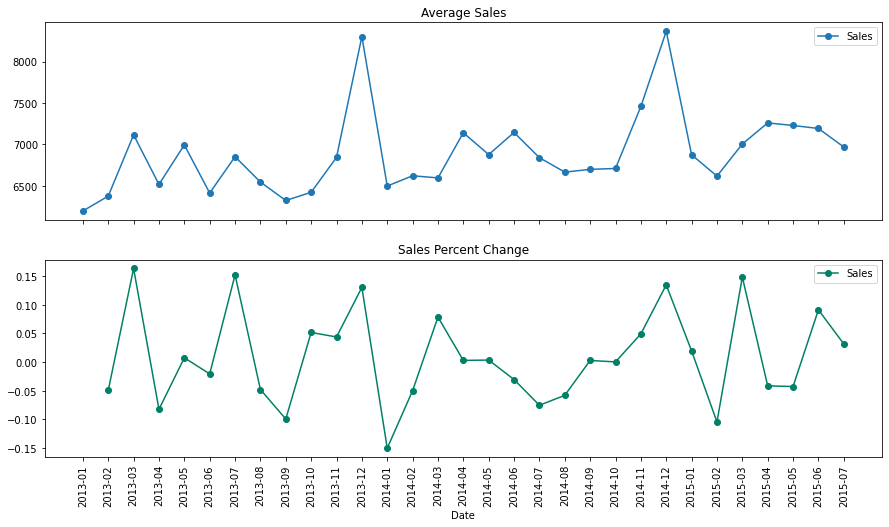

In [ ]:
# group by date and get average sales, and precent change
average_sales    = Final_df.groupby('Date')["Sales"].mean()
pct_change_sales = Final_df.groupby('Date')["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
# ax2.set_xticks(range(len(pct_change_sales)))
# ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)

In [ ]:
Final_df.drop(['Date','Store', 'Customers', 'Year'], axis = 1, inplace =True)

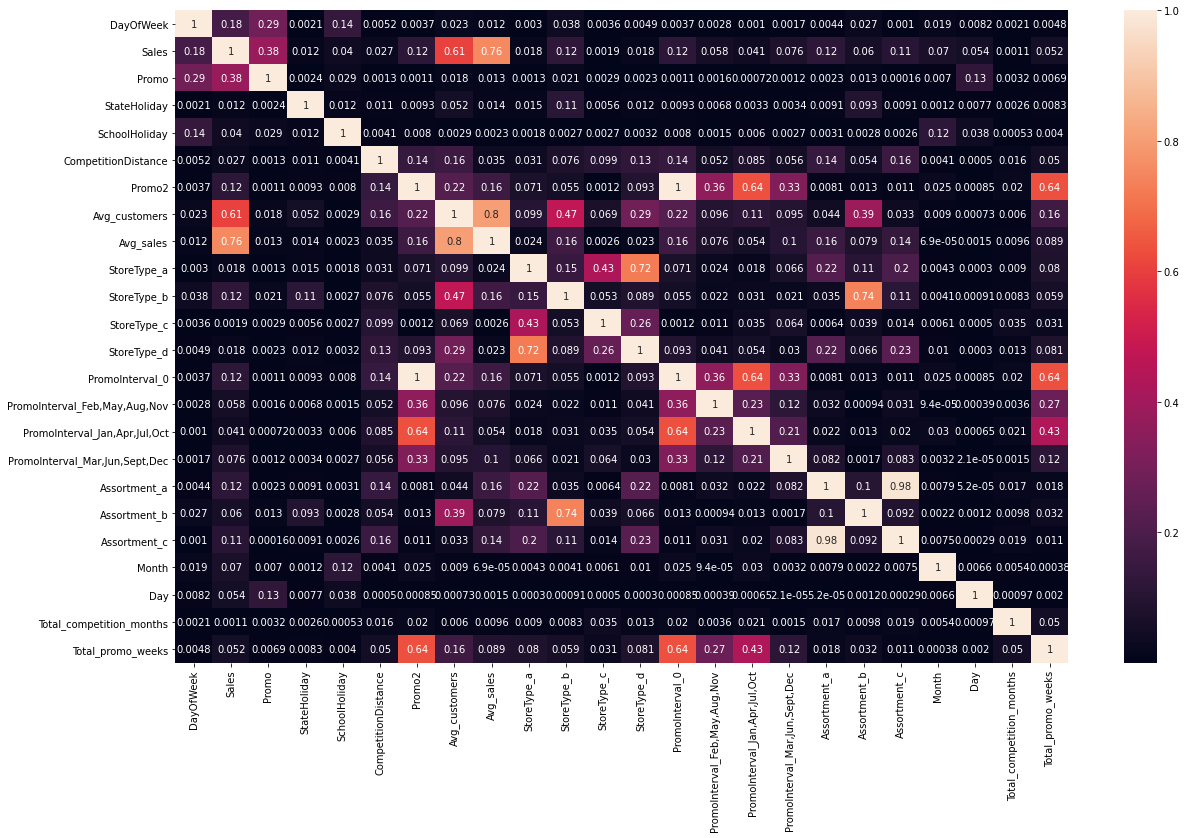

In [ ]:
plt.subplots(figsize=(20,12))
sns.heatmap(Final_df.corr().abs(), annot=True)

###Saving Final DF, so that can further use directly. 

In [ ]:
# Saving Final DF
Final_df.to_csv(folder + 'Final_dataset.csv', index= False)

In [ ]:
# Importing saved DF
Final_df_saved = pd.read_csv(folder + 'Final_dataset.csv')

In [ ]:
Final_df_saved.shape

(840222, 24)

##**Base Models.**

In [ ]:
# Copy of DataFrame
LR_df = Final_df_saved.copy()

In [ ]:
# Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression, LassoCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer


In [ ]:
LR_df['Sales'] = np.sqrt(LR_df['Sales'])
LR_df['Avg_customers'] = np.sqrt(LR_df['Avg_customers'])
LR_df['CompetitionDistance'] = np.sqrt(LR_df['CompetitionDistance'])
#LR_df['Total_competition_months'] = np.log(LR_df['Total_competition_months'])

In [ ]:
# X and Y
X = LR_df.drop(['Sales'], axis = 1)
y = LR_df['Sales']

##**Statistical Model**

In [ ]:
import statsmodels.api as sm

In [ ]:
#adding constant and building model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [ ]:
#statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                 1.277e+05
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        06:04:17   Log-Likelihood:            -2.9924e+06
No. Observations:              840222   AIC:                         5.985e+06
Df Residuals:                  840202   BIC:                         5.985e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             16.4526      0.051    322.306      0.000      16.353      16.553
DayOfWeek                         -0.8352      0.006   -146.671      0.000      -0.846      -0.824
Promo                             12.9666      0.020    658.224      0.000      12.928      13.005
StateHoliday                      -2.0787      0.290     -7.156      0.000      -2.648      -1.509
SchoolHoliday                      0.4051      0.024     16.911      0.000       0.358       0.452
CompetitionDistance                0.0015      0.000      6.355      0.000       0.001       0.002
Promo2                             6.8790      0.023    304.080      0.000       6.835       6.923
Avg_customers                      0.0644      0.005     13.523      0.000       0.055       0.074
Avg_sales                          0.0057   9.93e-06    571.243      0.000       0.006       0.006
StoreType_a                        4.0521      0.031    130.339      0.000       3.991       4.113
StoreType_b                        3.3766      0.087     38.783      0.000       3.206       3.547
StoreType_c                        4.2533      0.036    119.321      0.000       4.183       4.323
StoreType_d                        4.7706      0.033    144.772      0.000       4.706       4.835
PromoInterval_0                    9.5737      0.033    289.549      0.000       9.509       9.638
PromoInterval_Feb,May,Aug,Nov      2.2355      0.023     95.640      0.000       2.190       2.281
PromoInterval_Jan,Apr,Jul,Oct      2.4135      0.018    130.584      0.000       2.377       2.450
PromoInterval_Mar,Jun,Sept,Dec     2.2299      0.025     90.687      0.000       2.182       2.278
Assortment_a                       5.2151      0.044    117.559      0.000       5.128       5.302
Assortment_b                       5.9008      0.106     55.655      0.000       5.693       6.109
Assortment_c                       5.3367      0.046    115.772      0.000       5.246       5.427
Month                              0.3455      0.003    122.438      0.000       0.340       0.351
Day                               -0.0185      0.001    -17.134      0.000      -0.021      -0.016
Total_competition_months           0.0011      0.000      9.573      0.000       0.001       0.001
Total_promo_weeks                  0.0047      0.000     32.907      0.000       0.004       0.005
==============================================================================
Omnibus:                    74434.675   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           262082.641
Skew:                           0.423   Prob(JB):                         0.00
Kurtosis:                       5.602   Cond. No.                     6.09e+19
===============

### We can build a good regression model with 85% accuracy. Also P value for all coefficients is 0. So it is good to go with all features. 

## **Lasso Regression for Feature Importance.**

In [ ]:
X = LR_df.drop(['Sales'], axis = 1)
y = LR_df['Sales']

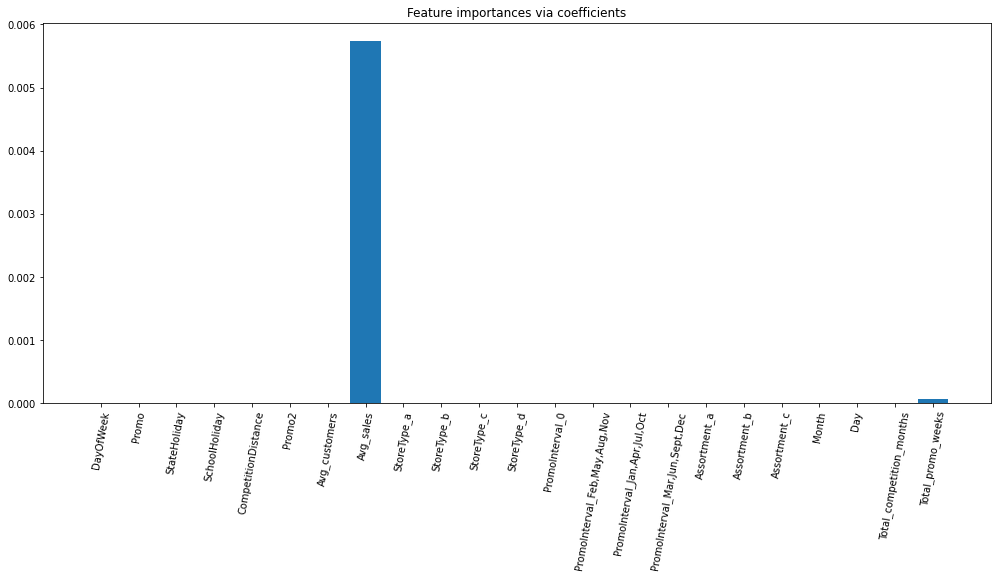

In [ ]:
plt.subplots(figsize=(17,7))
lasso = LassoCV()
lasso.fit(X,y)
importance = np.abs(lasso.coef_)
feature_names = X.columns
plt.bar(height=importance, x=feature_names)
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sfm = SelectFromModel(lasso).fit(X, y)
feature_names[sfm.get_support()]

Index(['Avg_sales', 'Total_promo_weeks'], dtype='object')

##**Linear Regression**

In [ ]:
X = LR_df.drop(['Sales'], axis = 1)
y = LR_df['Sales']

In [ ]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the Test set results
LR_test_pred = LR_model.predict(X_test)

In [ ]:
# Predicting Train
LR_Train_preds = LR_model.predict(X_train)

In [ ]:
# MSE
mean_squared_error(y_test**2,LR_test_pred**2)

2183071.7685405808

In [ ]:
# R-sqaured for Train
r2_score(y_train**2, LR_Train_preds**2)

0.7377101076723758

In [ ]:
# R-sqaured for Test
r2_score(y_test**2, LR_test_pred**2)

0.7400390913848326

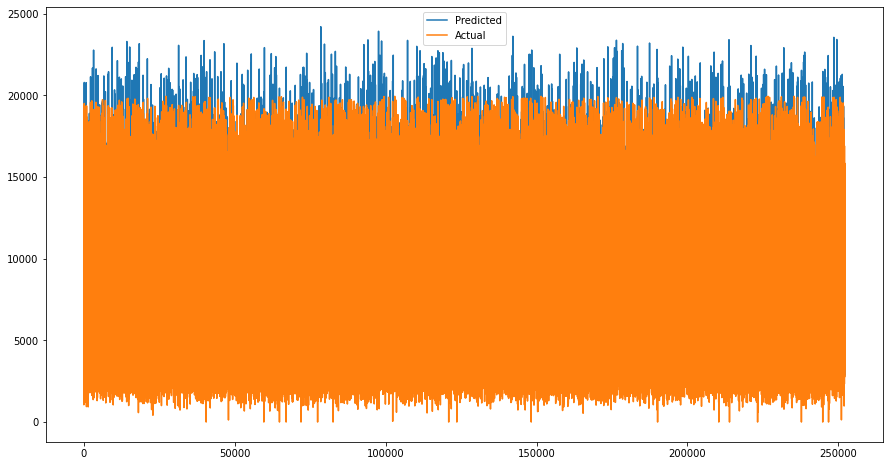

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(LR_test_pred**2)
plt.plot(np.array(y_test**2))
plt.legend(["Predicted","Actual"])
plt.show()

### It is a good model with almost 74% accuracy on train and test dataset.

### So it's not a overfitted model. But some errors. 

### But after all a good base model to start with.

### Other metric for model evaluation would be RMSE or MSE. We would try to get lowest RMSE score. So our error predictions are less.

##**Implementing Decision Trees**

In [ ]:
X = Final_df_saved.drop(['Sales'], axis = 1)
y = Final_df_saved['Sales']

In [ ]:
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

In [ ]:
# Importing DT Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Setting parameters for Grid Search
# Criteria
criterion = ['mse']

# Maximum depth of trees
max_depth = [ 18, 20,  25]

# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'criterion':criterion}

param_dict

{'criterion': ['mse'], 'max_depth': [18, 20, 25]}

In [ ]:
# Scorer
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print ('MSE: %2.3f' % mse)
    return mse

def R2(y_true,y_pred):    
     r2 = r2_score(y_true, y_pred)
     print ('R2: %2.3f' % r2)
     return r2

def two_score(y_true,y_pred):    
    MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV
    score = R2(y_true,y_pred)
    return score

def two_scorer():
    return make_scorer(two_score, greater_is_better=True) # change for false if using MSE

In [ ]:
# Create an instance of the Decision Tree Regressor
DTR_model = DecisionTreeRegressor()

# Grid search
DTR_grid = GridSearchCV(estimator = DTR_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring =two_scorer())

DTR_grid.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] criterion=mse, max_depth=18 .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MSE: 1078468.277
R2: 0.871
[CV] ...................... criterion=mse, max_depth=18, total=   4.2s
[CV] criterion=mse, max_depth=18 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


MSE: 1081937.630
R2: 0.870
[CV] ...................... criterion=mse, max_depth=18, total=   4.2s
[CV] criterion=mse, max_depth=18 .....................................
MSE: 1073592.664
R2: 0.872
[CV] ...................... criterion=mse, max_depth=18, total=   4.2s
[CV] criterion=mse, max_depth=20 .....................................
MSE: 1119883.937
R2: 0.866
[CV] ...................... criterion=mse, max_depth=20, total=   5.0s
[CV] criterion=mse, max_depth=20 .....................................
MSE: 1116652.609
R2: 0.866
[CV] ...................... criterion=mse, max_depth=20, total=   5.6s
[CV] criterion=mse, max_depth=20 .....................................
MSE: 1119057.107
R2: 0.866
[CV] ...................... criterion=mse, max_depth=20, total=   4.8s
[CV] criterion=mse, max_depth=25 .....................................
MSE: 1232930.333
R2: 0.853
[CV] ...................... criterion=mse, max_depth=25, total=   5.3s
[CV] criterion=mse, max_depth=25 ........................

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   44.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse'], 'max_depth': [18, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
    

In [ ]:
DTR_optimal_model = DTR_grid.best_estimator_
DTR_optimal_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=18,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
DTR_grid.best_params_

{'criterion': 'mse', 'max_depth': 18}

In [ ]:
DTR_grid.best_score_

0.8710944894178231

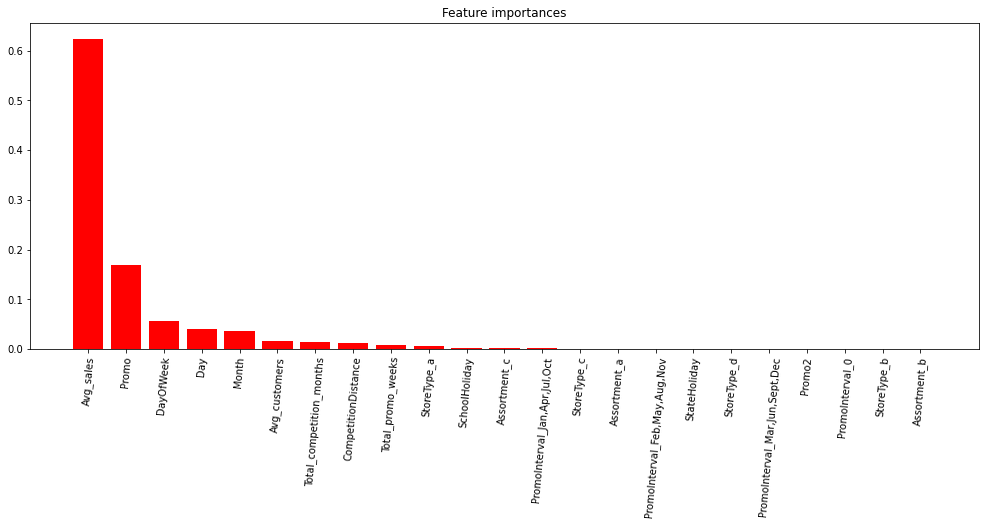

In [ ]:
# Feature importance
feature_importances_DTR = pd.DataFrame(DTR_optimal_model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance_DTR']).sort_values('importance_DTR',
                                                                        ascending=False)
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_DTR.index, feature_importances_DTR['importance_DTR'],
        color="r",  align="center")
plt.xticks(feature_importances_DTR.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Predictions Train and Test
DTR_train_pred = DTR_optimal_model.predict(X_train)
DTR_test_pred = DTR_optimal_model.predict(X_test)

In [ ]:
# MSE - Test 
mean_squared_error(y_test,DTR_test_pred)

993478.1781891334

In [ ]:
# R-sqaured for Train
r2_score(y_train, DTR_train_pred)

0.9392556149346968

In [ ]:
# R-sqaured for Test
r2_score(y_test, DTR_test_pred)

0.881696289781603

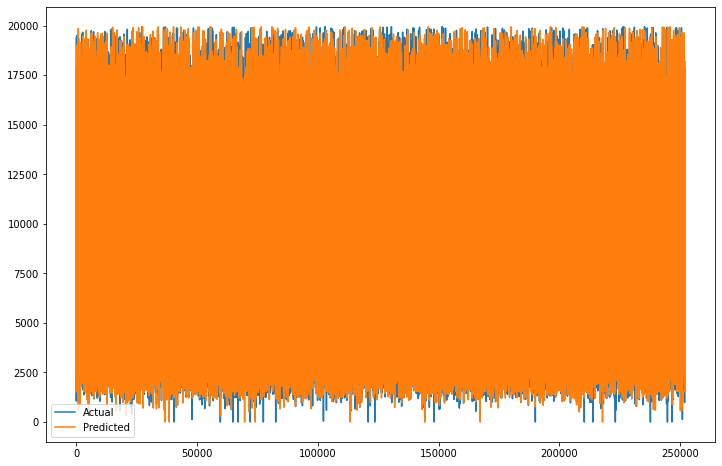

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(np.array(y_test))
plt.plot(DTR_test_pred)
plt.legend(["Actual","Predicted"])
plt.show()

###Almost 95% accuracy on test data. A bit of overfitting model as variance in train and test accuracy. 

### This model gets rid of error more than linear regression.

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Criterion
criterion = ['mse']
# Maximum depth of trees
max_depth = [20]

# Number of estimator
n_estimators = [100, 150]
# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'criterion':criterion,'n_estimators':n_estimators}

param_dict

{'criterion': ['mse'], 'max_depth': [20], 'n_estimators': [100, 150]}

In [ ]:
# Create an instance of the Decision Tree Regressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator = rf_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring = two_scorer() )

rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] criterion=mse, max_depth=20, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MSE: 680895.351
R2: 0.919
[CV] .... criterion=mse, max_depth=20, n_estimators=100, total= 5.2min
[CV] criterion=mse, max_depth=20, n_estimators=100 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.2min remaining:    0.0s


MSE: 680640.425
R2: 0.919
[CV] .... criterion=mse, max_depth=20, n_estimators=100, total= 5.2min
[CV] criterion=mse, max_depth=20, n_estimators=100 ...................
MSE: 679571.487
R2: 0.919
[CV] .... criterion=mse, max_depth=20, n_estimators=100, total= 5.3min
[CV] criterion=mse, max_depth=20, n_estimators=150 ...................
MSE: 678710.656
R2: 0.919
[CV] .... criterion=mse, max_depth=20, n_estimators=150, total= 8.0min
[CV] criterion=mse, max_depth=20, n_estimators=150 ...................
MSE: 678882.818
R2: 0.919
[CV] .... criterion=mse, max_depth=20, n_estimators=150, total= 7.9min
[CV] criterion=mse, max_depth=20, n_estimators=150 ...................
MSE: 678003.366
R2: 0.919
[CV] .... criterion=mse, max_depth=20, n_estimators=150, total= 8.1min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 39.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
rf_grid.best_params_

{'criterion': 'mse', 'max_depth': 20, 'n_estimators': 150}

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
y_pred_train_rf = rf_optimal_model.predict(X_train)   # Prediction for train dataset
y_pred_test_rf = rf_optimal_model.predict(X_test)     # Predictionfor test dataset

In [ ]:
# MSE - Test 
mean_squared_error(y_test,y_pred_test_rf)

In [ ]:
# Test
r2_score((y_test), (y_pred_test_rf))

0.9246148368884721

In [ ]:
# Train
r2_score((y_train), (y_pred_train_rf))

0.9654586348969053

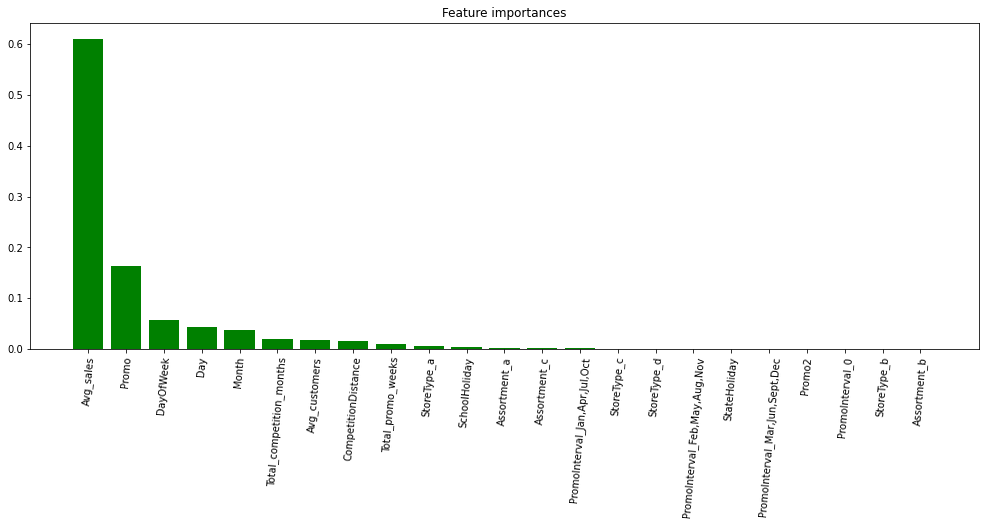

In [ ]:
# Feature Importance
feature_importances_rf = pd.DataFrame(rf_optimal_model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

### Above are important features.

### a good model with good accuracy but a bit of overfitting yet.

##**LIGHT GBM**

In [ ]:
import lightgbm as lgb

In [ ]:
# Maximum depth of trees
max_depth = [15,20, 22]

# bagging fraction
bagging_fraction = [0.5, 0.6,0.7]

#max-bin
max_bin = [400, 500, 600]

# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'bagging_fraction':bagging_fraction, 'max_bin': max_bin}

param_dict

{'bagging_fraction': [0.5, 0.6, 0.7],
 'max_bin': [400, 500, 600],
 'max_depth': [15, 20, 22]}

In [ ]:
# Create an instance of the LGBRegressor
LGB = lgb.LGBMRegressor()

# Grid search
LGB_grid = GridSearchCV(estimator = LGB,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring = 'r2')

LGB_grid.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] bagging_fraction=0.5, max_bin=400, max_depth=15 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. bagging_fraction=0.5, max_bin=400, max_depth=15, total=   5.8s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=15 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.8s remaining:    0.0s


[CV] .. bagging_fraction=0.5, max_bin=400, max_depth=15, total=   5.7s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=15 .................
[CV] .. bagging_fraction=0.5, max_bin=400, max_depth=15, total=   5.5s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=20 .................
[CV] .. bagging_fraction=0.5, max_bin=400, max_depth=20, total=   5.6s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=20 .................
[CV] .. bagging_fraction=0.5, max_bin=400, max_depth=20, total=   5.5s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=20 .................
[CV] .. bagging_fraction=0.5, max_bin=400, max_depth=20, total=   5.7s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=22 .................
[CV] .. bagging_fraction=0.5, max_bin=400, max_depth=22, total=   5.8s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=22 .................
[CV] .. bagging_fraction=0.5, max_bin=400, max_depth=22, total=   5.7s
[CV] bagging_fraction=0.5, max_bin=400, max_depth=22 .................
[CV] .

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  7.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bagging_fraction': [0.5, 0.6, 0.7],
                         'max_bin': [400, 500, 600],
                         'max_depth': [15, 20, 22]},
            

In [ ]:
LGB_grid.best_score_

0.8763497672868336

In [ ]:
optimal_model = LGB_grid.best_estimator_
optimal_model

LGBMRegressor(bagging_fraction=0.5, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
              max_bin=500, max_depth=15, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=31, objective=None, random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [ ]:
LGB_grid.best_params_

{'bagging_fraction': 0.5, 'max_bin': 500, 'max_depth': 15}

In [ ]:
y_pred_train_LGB = optimal_model.predict(X_train)   # Prediction for train dataset
y_pred_test_LGB = optimal_model.predict(X_test)     # Predictionfor test dataset

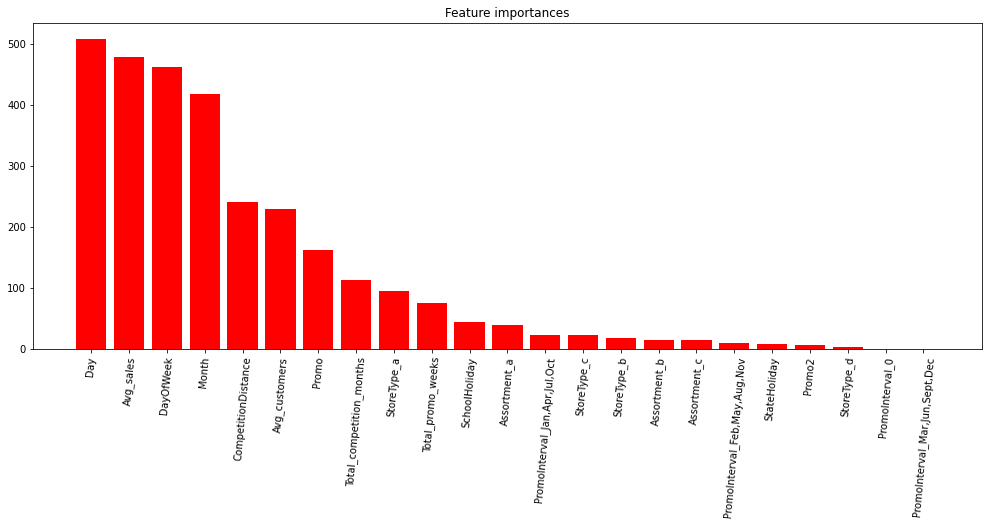

In [ ]:
# Feature Importance
feature_importances_LGB = pd.DataFrame(optimal_model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance_LGB']).sort_values('importance_LGB',
                                                                        ascending=False)
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_LGB.index, feature_importances_LGB['importance_LGB'],
        color="r",  align="center")
plt.xticks(feature_importances.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()                                    

In [ ]:
# MSE - Test 
mean_squared_error(y_test,y_pred_test_LGB)

1030476.0812128935

In [ ]:
# R-sqaured for Train
r2_score(y_train, y_pred_train_LGB)

0.8769582459603233

In [ ]:
# R-sqaured for Test
r2_score(y_test, y_pred_test_LGB)

0.8772905672462682

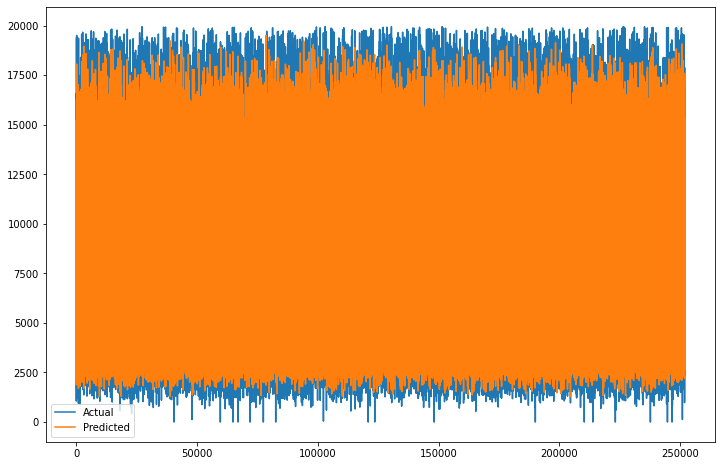

In [ ]:
plt.figure(figsize=(12,8))

plt.plot(np.array(y_test))
plt.plot(y_pred_test_LGB)
plt.legend(["Actual","Predicted"])
plt.show()

##**Now its time for Stacking !**

In [ ]:
Stack_df = Final_df_saved.copy()

In [ ]:
models = [
    DecisionTreeRegressor(max_depth=18, criterion = 'mse'),
    RandomForestRegressor(max_depth=20, n_estimators = 150,criterion='mse'),
    lgb.LGBMRegressor(bagging_fraction = 0.5, max_bin = 500, max_depth = 15)
]

In [ ]:
!pip install vecstack

In [ ]:
from vecstack import stacking

In [ ]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=True, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric= r2_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

/usr/local/lib/python3.6/dist-packages/vecstack/core.py:461: UserWarning: This is regression task hence classification-specific parameters set to <True> were ignored: <stratified>
  warnings.warn(warn_str, UserWarning)


task:         [regression]
metric:       [r2_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [DecisionTreeRegressor]
    fold  0:  [0.87397435]
    fold  1:  [0.87525865]
    fold  2:  [0.87303075]
    fold  3:  [0.87540454]
    ----
    MEAN:     [0.87441707] + [0.00097484]
    FULL:     [0.87442140]

model  1:     [RandomForestRegressor]
    fold  0:  [0.91909156]
    fold  1:  [0.92124530]
    fold  2:  [0.91956942]
    fold  3:  [0.92040723]
    ----
    MEAN:     [0.92007838] + [0.00082199]
    FULL:     [0.92008207]

model  2:     [LGBMRegressor]
    fold  0:  [0.87380296]
    fold  1:  [0.87794707]
    fold  2:  [0.87503647]
    fold  3:  [0.87653471]
    ----
    MEAN:     [0.87583030] + [0.00155862]
    FULL:     [0.87583717]



In [ ]:
import xgboost as xgb

In [ ]:
# Number of trees
n_estimators = [100, 200]

# Maximum depth of trees
max_depth = [8, 12, 20]

# Child weight
min_child_weight= [10, 15]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,'min_child_weight': min_child_weight }

param_dict        

{'max_depth': [8, 12, 20],
 'min_child_weight': [10, 15],
 'n_estimators': [100, 200]}

In [ ]:
# Create an instance of the Meta Regressor
stacked_model = xgb.XGBRegressor()

# Grid search
stacked_grid = GridSearchCV(estimator = stacked_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring = 'r2' )

stacked_grid.fit(S_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_depth=8, min_child_weight=10, n_estimators=100 ..............
[07:59:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=8, min_child_weight=10, n_estimators=100, total=  42.1s
[CV] max_depth=8, min_child_weight=10, n_estimators=100 ..............
[07:59:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.1s remaining:    0.0s


[CV]  max_depth=8, min_child_weight=10, n_estimators=100, total=  42.9s
[CV] max_depth=8, min_child_weight=10, n_estimators=100 ..............
[08:00:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_depth=8, min_child_weight=10, n_estimators=100, total=  43.4s
[CV] max_depth=8, min_child_weight=10, n_estimators=200 ..............
[08:01:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_depth=8, min_child_weight=10, n_estimators=200, total= 1.3min
[CV] max_depth=8, min_child_weight=10, n_estimators=200 ..............
[08:02:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  max_depth=8, min_child_weight=10, n_estimators=200, total= 1.3min
[CV] max_depth=8, min_child_weight=10, n_estimators=200 ..............
[08:03:48] WARNING: /workspace/src/objective/re

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 60.7min finished


[08:59:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [8, 12, 20], 'min_child_weight': [10, 15],
                         'n_estimators': [100, 200]

In [ ]:
stacked_grid.best_params_

{'max_depth': 8, 'min_child_weight': 15, 'n_estimators': 100}

In [ ]:
stacked_grid.best_score_

0.9205921184477676

In [ ]:
stacked_optimal_model = stacked_grid.best_estimator_
stacked_optimal_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=15, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_test_stack = stacked_optimal_model.predict(S_test)

In [ ]:
y_pred_train_stack = stacked_optimal_model.predict(S_train)

In [ ]:
r2_score(y_train, y_pred_train_stack)

0.9231127480427326

In [ ]:
r2_score(y_test, y_pred_test_stack)

0.9248847511255914

In [ ]:
np.sqrt(mean_squared_error((y_test), (y_pred_test_stack)))

794.2258878579418

### This is a good optimal model with good accuracy as well good predictions. 

### RMSE for test has reduced to 794 which is a good fit for such large data set.

##**Conclusions**

###**Conclusions from EDA**

> There are very few stores open on 'State Holidays' and they make a good profit on those days then any average day. 

> On 'School Holidays' there is no large difference in sale. So promos running during 'School Holidays' can be reduced and can be added for average days. So even on average days stores can make good profit.

> At the start of month the sale increases, same for every week. People might be planning to shop for a month or week. So can add promos accordingly. 

> There is high sale for promos running from 2nd quarter.

> For assortment a and c seems to be small or retail stores with daily sale. While type b seems to be a bigger store. Can have more promotional offer for store b.

> Seen some seasonal trend for some months. Should check out for promos for that also.

> Promos need to be changed regularly after few months. So people get a new start for each promo. Because initially people seem to be attracted and after few months sales decrease for continous promo.

###**Model Conclusions**

> Our final optimal model would be the stacked model. As it gives us best accuracy R2_score also reduced RMSE to 794. 

> Below are stats for each model and features important for each model.

In [ ]:
Result_df = pd.DataFrame({'Models': ['Linear_regression', 'Decision Tree', 'Random Forest','LGB', 'Stacked'], 'Train R2 score' :[73.99, 93.92, 96.54, 87.69, 92.31], 'Test R2 score': [74, 88.16, 92.46, 87.77, 92.48], 'Conclusion' :['Simple base Model', 'a bit of overfitting model','Good Accuraccy, but a bit a overfitting', 'Good Model but comparitively low accuracy', 'Optimal model with good accuracy and best fit']})

In [ ]:
# Model conclusion Df
Result_df.set_index('Models')

,Train R2 score,Test R2 score,Conclusion
Models,,,
Linear_regression,73.99,74.00,Simple base Model
Decision Tree,93.92,88.16,a bit of overfitting model
Random Forest,96.54,92.46,"Good Accuraccy, but a bit a overfitting"
LGB,87.69,87.77,Good Model but comparitively low accuracy
Stacked,92.31,92.48,Optimal model with good accuracy and best fit


In [ ]:
feature_df = pd.merge(feature_importances_DTR, feature_importances_rf, left_index=True, right_index=True)
feature_df = pd.merge(feature_df, feature_importances_LGB, left_index=True, right_index=True)

In [ ]:
#Feature Importance DF
feature_df['Mean_importance/ Stacked'] = (feature_df['importance_DTR'] + feature_df['importance_rf'] + feature_df['importance_LGB'])/3
feature_df

,importance_DTR,importance_rf,importance_LGB,Mean_importance/ Stacked
Avg_sales,0.624267,0.610594,479,160.078287
Promo,0.168334,0.163582,163,54.443972
DayOfWeek,0.057503,0.058166,463,154.371890
Day,0.041453,0.043895,509,169.695116
Month,0.036492,0.038205,418,139.358232
Avg_customers,0.016543,0.017398,229,76.344647
Total_competition_months,0.015208,0.020969,114,38.012059
CompetitionDistance,0.013236,0.015365,241,80.342867
Total_promo_weeks,0.008350,0.010984,76,25.339778
StoreType_a,0.006075,0.005710,96,32.003929


In [ ]:
# Creating this DF to just plot below feature importance as was disconnected and won't have to run again. DF was already saved. 
temp = Final_df_saved.copy()
temp_df = pd.DataFrame(temp.columns)

In [ ]:
temp_df = temp_df.drop(1).reset_index(drop=True)

In [ ]:
temp_df['Mean_importance/ Stacked'] = [154.37, 54.44, 3.005, 15.002, 80.34, 2.33, 76.344, 160.07, 32.003, 6.0002, 7.667, 1.0005, 0.3336, 3.6672, 8.001, 0.3338, 13.3342, 5.0001, 5.0011, 139.358, 169.695, 38.012, 25.3397]

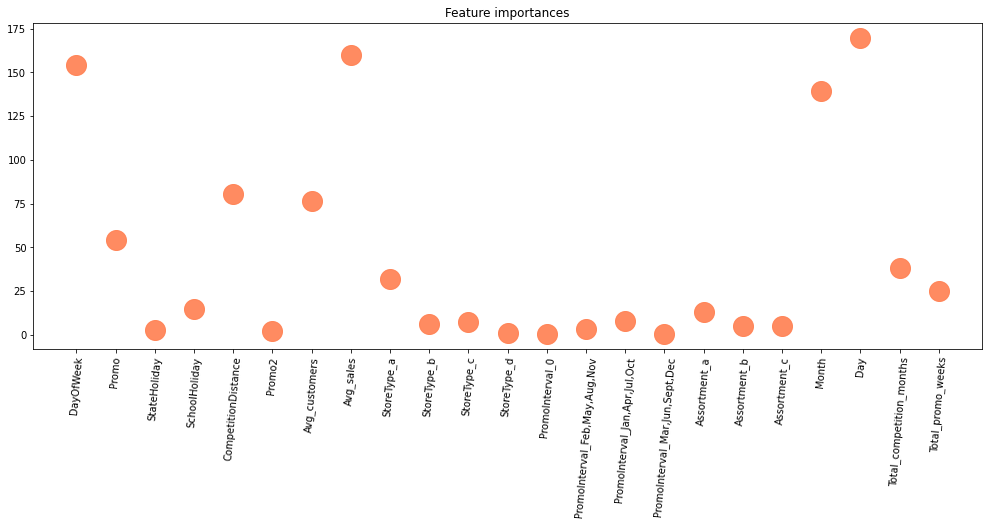

In [ ]:
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.scatter(temp_df[0], temp_df['Mean_importance/ Stacked'],
        c="coral", alpha = 0.9, s = 400)
plt.xticks(temp_df[0], rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()  

##*Hope above insights/ conclusions help store managers make good predictions for their future sale and even increase them accordingly.*

#* *Cheers !!* *

In [ ]:
import random
from datetime import datetime

In [ ]:

vals = ['A,' * 8, 'B,' * 8, 'C,' *8]
person = []
for x in vals:
    for y in x.split(','):
        if y != '':
            person.append(y)

metric1 = [random.random() for _ in range(0, 24)]
metric2 = [random.random() for _ in range(0, 24)]
dates = [datetime(2017,1,1), datetime(2017, 2, 1), datetime(2017, 3, 1), datetime(2017, 4, 1), 
         datetime(2017,5,1), datetime(2017, 6, 1), datetime(2017, 7, 1), datetime(2017, 8, 1)] * 3

# load into a dataframe
df = pd.DataFrame({'person': person, 
                   'metric1': metric1, 
                   'metric2': metric2,
                   'timestamp': dates})

In [ ]:
df

,person,metric1,metric2,timestamp
0,A,0.328575,0.278286,2017-01-01
1,A,0.641328,0.684402,2017-02-01
2,A,0.039900,0.060293,2017-03-01
3,A,0.650489,0.239067,2017-04-01
4,A,0.206151,0.782238,2017-05-01
5,A,0.422719,0.434225,2017-06-01
6,A,0.072215,0.325933,2017-07-01
7,A,0.415214,0.131556,2017-08-01
8,B,0.798125,0.156017,2017-01-01
9,B,0.752507,0.494365,2017-02-01


In [ ]:
df.groupby("person").apply(lambda x: x["metric1"].ewm(span=60).mean()).reset_index()

,person,level_1,metric1
0,A,0,0.328575
1,A,1,0.487558
2,A,2,0.333337
3,A,3,0.416633
4,A,4,0.371684
5,A,5,0.380914
6,A,6,0.332284
7,A,7,0.343899
8,B,8,0.798125
9,B,9,0.774936
